## 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd

## 데이터프레임 가공하기

In [2]:
df = pd.read_csv('./data/(연령별 2000~2020) 데이터.csv', encoding='euc-kr')
df

,사망원인별(103항목),성별,연령(5세)별,2000,2000.1,2001,2001.1,2002,2002.1,2003,...,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
0,사망원인별(103항목),성별,연령(5세)별,사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),...,사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당)
1,고의적 자해(자살) (X60-X84),계,계,6522,13.7,6968,14.6,8665,18.0,10973,...,13092,25.6,12463,24.3,13670,26.6,13799,26.9,13195,25.7
2,고의적 자해(자살) (X60-X84),계,0세,0,-,0,-,0,-,0,...,0,-,0,-,0,-,0,-,0,-
3,고의적 자해(자살) (X60-X84),계,1 - 4세,0,-,0,-,0,-,0,...,0,-,0,-,0,-,0,-,0,-
4,고의적 자해(자살) (X60-X84),계,5 - 9세,7,0.2,4,0.1,0,-,1,...,0,-,1,0.0,1,0.0,2,0.1,2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,고의적 자해(자살) (X60-X84),여자,90세이상,14,34.0,12,27.8,35,76.2,32,...,80,62.6,46,33.1,73,47.9,73,43.6,64,34.7
75,고의적 자해(자살) (X60-X84),여자,15세 미만,10,0.2,23,0.5,17,0.4,18,...,10,0.3,13,0.4,24,0.7,23,0.7,28,0.9
76,고의적 자해(자살) (X60-X84),여자,15 - 64세,1489,8.8,1462,8.6,1800,10.5,2283,...,2725,14.9,2521,13.8,2782,15.3,2988,16.5,3053,16.9
77,고의적 자해(자살) (X60-X84),여자,65세 이상,495,24.2,595,27.7,874,38.9,1104,...,1114,28.4,1006,24.7,1002,23.7,1058,24.0,1021,22.1


In [3]:
# 상수 정의
YEARS = list(map(str, range(2000, 2020+1)))

In [4]:
df['사망원인별(103항목)'][1:].value_counts()

고의적 자해(자살) (X60-X84)    78
Name: 사망원인별(103항목), dtype: int64

In [5]:
df.drop(columns=['사망원인별(103항목)'], inplace=True)

# df.drop([0, 1], inplace=True)
df.index = [df['성별'], df['연령(5세)별']]
df.drop(columns=['성별', '연령(5세)별'], inplace=True)

df_year_list = []

for year in YEARS:
    df_year = df[2:].loc[:, f'{year}':f'{year}.1'].copy()  # df.drop() 대신 df[2:] 사용
    df_year.columns = [
        [f'{year}']*2,
        ['사망자수 (명)', '사망률 (십만명당)']
    ]
    df_year_list.append(df_year)
    
df = pd.concat(df_year_list, axis=1)

# column의 년도를 index로 옮기기
df = pd.concat([pd.concat({year: df[year]}, names=['년도']) for year in YEARS], axis=0)

df

사망자수 (명) 사망률 (십만명당)
년도   성별 연령(5세)별                     
2000 계  0세              0          -
        1 - 4세          0          -
        5 - 9세          7        0.2
        10 - 14세       24        0.8
        15 - 19세      243        6.3
...                   ...        ...
2020 여자 90세이상          64       34.7
        15세 미만         28        0.9
        15 - 64세     3053       16.9
        65세 이상       1021       22.1
        연령미상            0          -

[1617 rows x 2 columns]

In [6]:
df_is_dash = df[(df == '-').any(axis=1)]
df_is_dash

사망자수 (명) 사망률 (십만명당)
년도   성별 연령(5세)별                    
2000 계  0세             0          -
        1 - 4세         0          -
        연령미상           0          -
     남자 0세             0          -
        1 - 4세         0          -
...                  ...        ...
2020 남자 5 - 9세         0          -
        연령미상           0          -
     여자 0세             0          -
        1 - 4세         0          -
        연령미상           0          -

[219 rows x 2 columns]

In [7]:
df_is_dash[(df[(df == '-').any(axis=1)]['사망자수 (명)'] != '0')]

사망자수 (명) 사망률 (십만명당)
년도   성별 연령(5세)별                    
2002 계  연령미상           1          -
     남자 연령미상           1          -
2007 계  연령미상           1          -
     남자 연령미상           1          -
2009 계  연령미상          10          -
     남자 연령미상           9          -
     여자 연령미상           1          -
2010 계  연령미상           8          -
     남자 연령미상           8          -
2012 계  연령미상           1          -
     남자 연령미상           1          -
2013 계  연령미상           1          -
     남자 연령미상           1          -
2014 계  연령미상           2          -
     남자 연령미상           1          -
     여자 연령미상           1          -
2015 계  연령미상           3          -
     남자 연령미상           3          -
2017 계  연령미상           2          -
     남자 연령미상           1          -
     여자 연령미상           1          -
2019 계  연령미상           6          -
     남자 연령미상           6          -

In [8]:
df.drop(['80세이상', '15세 미만', '15 - 64세', '65세 이상', '연령미상'], level=2, inplace=True)
df

사망자수 (명) 사망률 (십만명당)
년도   성별 연령(5세)별                     
2000 계  0세              0          -
        1 - 4세          0          -
        5 - 9세          7        0.2
        10 - 14세       24        0.8
        15 - 19세      243        6.3
...                   ...        ...
2020 여자 70 - 74세      163       15.3
        75 - 79세      193       21.0
        80 - 84세      233       33.4
        85 - 89세      149       38.6
        90세이상          64       34.7

[1302 rows x 2 columns]

In [9]:
df = df.replace('-', 0).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1302 entries, ('2000', '계', '0세') to ('2020', '여자', '90세이상')
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망자수 (명)    1302 non-null   int64  
 1   사망률 (십만명당)  1302 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.5+ KB


In [10]:
df.index[:20]

MultiIndex([('2000', '계',       '0세'),
            ('2000', '계',   '1 - 4세'),
            ('2000', '계',   '5 - 9세'),
            ('2000', '계', '10 - 14세'),
            ('2000', '계', '15 - 19세'),
            ('2000', '계', '20 - 24세'),
            ('2000', '계', '25 - 29세'),
            ('2000', '계', '30 - 34세'),
            ('2000', '계', '35 - 39세'),
            ('2000', '계', '40 - 44세'),
            ('2000', '계', '45 - 49세'),
            ('2000', '계', '50 - 54세'),
            ('2000', '계', '55 - 59세'),
            ('2000', '계', '60 - 64세'),
            ('2000', '계', '65 - 69세'),
            ('2000', '계', '70 - 74세'),
            ('2000', '계', '75 - 79세'),
            ('2000', '계', '80 - 84세'),
            ('2000', '계', '85 - 89세'),
            ('2000', '계',    '90세이상')],
           names=['년도', '성별', '연령(5세)별'])

In [11]:
df.columns

Index(['사망자수 (명)', '사망률 (십만명당)'], dtype='object')

## 데이터 분석하기

In [12]:
df_gender = pd.DataFrame([[
    df.loc[year, '남자', '계']['사망률 (십만명당)'], df.loc[year, '여자', '계']['사망률 (십만명당)']]
    for year in YEARS], index=YEARS, columns=['남자', '여자'])
df_gender

,남자,여자
2000,19.0,8.4
2001,20.3,8.7
2002,24.7,11.2
2003,31.2,14.1
2004,32.6,15.0
2005,33.1,16.6
2006,29.7,14.2
2007,31.6,18.2
2008,33.4,18.7
2009,39.9,22.1


In [13]:
df.index[:20]

MultiIndex([('2000', '계',       '0세'),
            ('2000', '계',   '1 - 4세'),
            ('2000', '계',   '5 - 9세'),
            ('2000', '계', '10 - 14세'),
            ('2000', '계', '15 - 19세'),
            ('2000', '계', '20 - 24세'),
            ('2000', '계', '25 - 29세'),
            ('2000', '계', '30 - 34세'),
            ('2000', '계', '35 - 39세'),
            ('2000', '계', '40 - 44세'),
            ('2000', '계', '45 - 49세'),
            ('2000', '계', '50 - 54세'),
            ('2000', '계', '55 - 59세'),
            ('2000', '계', '60 - 64세'),
            ('2000', '계', '65 - 69세'),
            ('2000', '계', '70 - 74세'),
            ('2000', '계', '75 - 79세'),
            ('2000', '계', '80 - 84세'),
            ('2000', '계', '85 - 89세'),
            ('2000', '계',    '90세이상')],
           names=['년도', '성별', '연령(5세)별'])

In [14]:
AGES = ['0세',
        '1 - 4세',
        '5 - 9세',
        '10 - 14세',
        '15 - 19세',
        '20 - 24세',
        '25 - 29세',
        '30 - 34세',
        '35 - 39세',
        '40 - 44세',
        '45 - 49세',
        '50 - 54세',
        '55 - 59세',
        '60 - 64세',
        '65 - 69세',
        '70 - 74세',
        '75 - 79세',
        '80 - 84세',
        '85 - 89세',
        '90세이상']

df_age = pd.DataFrame([[
    df.loc[year, '계', '0세']['사망률 (십만명당)'],
    df.loc[year, '계', '1 - 4세']['사망률 (십만명당)'],
    df.loc[year, '계', '5 - 9세']['사망률 (십만명당)'],
    df.loc[year, '계', '10 - 14세']['사망률 (십만명당)'],
    df.loc[year, '계', '15 - 19세']['사망률 (십만명당)'],
    df.loc[year, '계', '20 - 24세']['사망률 (십만명당)'],
    df.loc[year, '계', '25 - 29세']['사망률 (십만명당)'],
    df.loc[year, '계', '30 - 34세']['사망률 (십만명당)'],
    df.loc[year, '계', '35 - 39세']['사망률 (십만명당)'],
    df.loc[year, '계', '40 - 44세']['사망률 (십만명당)'],
    df.loc[year, '계', '45 - 49세']['사망률 (십만명당)'],
    df.loc[year, '계', '50 - 54세']['사망률 (십만명당)'],
    df.loc[year, '계', '55 - 59세']['사망률 (십만명당)'],
    df.loc[year, '계', '60 - 64세']['사망률 (십만명당)'],
    df.loc[year, '계', '65 - 69세']['사망률 (십만명당)'],
    df.loc[year, '계', '70 - 74세']['사망률 (십만명당)'],
    df.loc[year, '계', '75 - 79세']['사망률 (십만명당)'],
    df.loc[year, '계', '80 - 84세']['사망률 (십만명당)'],
    df.loc[year, '계', '85 - 89세']['사망률 (십만명당)'],
    df.loc[year, '계', '90세이상']['사망률 (십만명당)'],
]
    for year in YEARS],
    index=YEARS,
    columns=AGES)
df_age

,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90세이상
2000,0.0,0.0,0.2,0.8,6.3,11.1,11.3,13.5,17.0,19.0,19.2,20.0,24.8,25.8,26.4,34.6,46.8,52.7,55.1,37.4
2001,0.0,0.0,0.1,1.0,5.4,9.9,12.4,14.2,16.7,17.1,20.4,23.2,24.7,29.2,32.7,39.8,51.4,65.2,63.3,46.5
2002,0.0,0.0,0.0,0.9,6.0,10.7,14.4,16.8,20.7,21.0,24.7,27.5,29.3,35.1,36.4,52.8,72.2,95.0,101.9,94.1
2003,0.0,0.0,0.0,1.0,8.2,13.6,17.1,20.0,24.1,27.2,29.5,32.8,37.4,42.3,57.1,59.1,93.4,109.7,128.7,106.8
2004,0.0,0.0,0.0,1.3,6.6,12.7,15.5,18.1,23.5,27.8,31.6,36.5,40.3,46.1,58.5,74.9,93.3,126.8,133.1,97.8
2005,0.0,0.0,0.0,1.1,7.9,16.3,19.5,21.2,22.5,26.0,30.9,33.9,35.7,47.8,62.7,74.8,89.7,128.0,122.0,144.2
2006,0.0,0.0,0.0,1.0,6.3,12.1,15.7,15.1,18.8,22.4,27.6,32.4,35.2,41.1,53.7,68.4,83.6,113.9,112.9,118.8
2007,0.0,0.0,0.0,1.5,8.0,18.6,23.5,23.4,21.6,24.8,28.1,29.9,33.1,41.6,54.7,71.0,91.2,109.2,128.7,143.3
2008,0.0,0.0,0.0,1.4,8.0,19.3,25.2,22.5,26.6,26.4,30.4,31.4,35.0,40.2,54.5,66.8,80.3,109.0,124.5,103.9
2009,0.0,0.0,0.1,2.3,10.7,20.3,29.3,31.2,31.5,31.0,34.7,41.3,40.7,47.0,57.0,71.0,91.6,117.2,149.9,127.1


## 시각화

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plt.rcParams['font.family'] = 'NanumGothic'

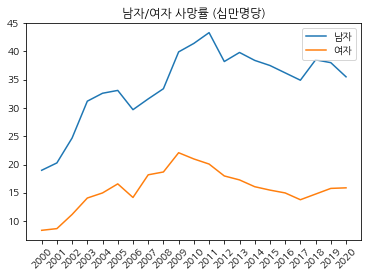

In [17]:
plt.title('남자/여자 사망률 (십만명당)')
sns.lineplot(data=df_gender, dashes=False)
plt.xticks(rotation=45)
plt.show()

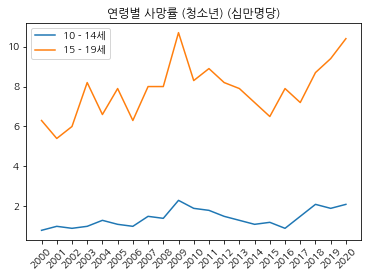

In [18]:
plt.title('연령별 사망률 (청소년) (십만명당)')
sns.lineplot(data=df_age[['10 - 14세', '15 - 19세']], dashes=False)
plt.xticks(rotation=45)
plt.show()

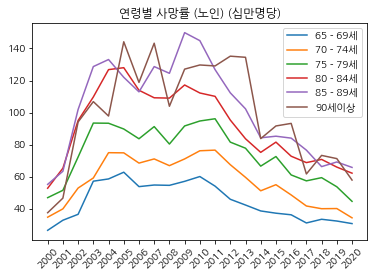

In [19]:
plt.title('연령별 사망률 (노인) (십만명당)')
sns.lineplot(data=df_age[['65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90세이상']], dashes=False)
plt.xticks(rotation=45)
plt.show()